# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [519]:
DATA_FOLDER = '/Users/abouzaid/Desktop/MA1/ADA/Tutos (2nd done)/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

#### First of all, let us explain our conventions and assumptions for this exercise. 
For both new cases and deaths, we only took the values from the total column.

1. By new cases, we included probable new cases, suspected new cases and confirmed new cases for the 3 countries.
2. By deaths, we included the 'newly reported deaths' for Liberia, 'etc_new_deaths' for Sierra Leone and 'Total new cases registered so far' for Guinea, since the difference between the first and the last cumulative values will allow us to know how many deaths occured between the whole period.

So for each country, we extract these informations, along with the month and the day. We then sum up the new cases and the deaths, seperately, for each month.
 <bn>*Not all the 3 countries have the reports for the same months (i.e. some months are NOT shared in common between the 3 report files) In theses cases we skip those months and mark 'not provied' for the corresponding month AND country in the resulting Dataframe. We will see this further below.

#### N.B: For Guinea and Liberia, there is some corrupted files that don't contain at least one of the the rows mentionned in 1. or 2. We decided to skip those files.  


In [520]:
#Import required libraries
import glob
import math
import numpy as np
import pandas as pd 

In [521]:
def getFiles(countryData):
    return glob.glob(DATA_FOLDER + '/ebola/' + countryData + '/*.csv')

def createDF(countryData, dateField, corruptedFiles):
    files = getFiles(countryData)
    list_ = []
    for file_ in files:
        # since certain file are corrupted and
        # there is no way for us to exactly match columns of
        # these to other files, we excluded them
        if file_.split("/")[-1] not in corruptedFiles:
            df_ = pd.read_csv(file_, parse_dates=[dateField,])                
            list_.append(df_)

    # fill NAN values with 0 for ease of calculation
    dfDummy = pd.concat(list_).fillna(0.)
    
    # standartize column names
    dfDummy = dfDummy.rename(columns={'Variable': 'description','Date': 'date',\
                          'variable': 'description','National': 'total',\
                          'Description': 'description', 'Total':'total',\
                          'Totals':'total'})

    # create new column called month
    dfDummy['month'] = dfDummy.apply(lambda x: x['date'].month, axis=1)
    dfDummy['day'] = dfDummy.apply(lambda x: x['date'].day, axis=1)
    return dfDummy

# Liberia

##### List of corrupted files for Liberia

In [522]:
corruptedLiberia = ["2014-12-09.csv","2014-12-08.csv","2014-12-07.csv","2014-12-06.csv",
                    "2014-12-05.csv","2014-12-04.csv","2014-12-03.csv"]

## New cases

In [523]:
# Average new cases per month for Liberia
# We've used the total of following three rows:
# New case/s (confirmed)
# New Case/s (Probable)
# New Case/s (Suspected)in order to calculate daily average
# since this rows gives the overall information of how many new cases occured each day
dfLiberia = createDF('liberia_data', 'Date', corruptedLiberia)
dfLiberia = dfLiberia[(dfLiberia.description == 'New Case/s (Suspected)')\
          | (dfLiberia.description == 'New Case/s (Probable)')\
          | (dfLiberia.description == 'New case/s (confirmed)')]
dfLiberia = dfLiberia.set_index(['month', 'day', 'description'])
dfLiberia['total'] = dfLiberia.total.astype('float64')
liberiaNC = dfLiberia.groupby(level=['month','day']).sum().groupby(level=['month']).mean()[['total']]
liberiaNC.columns=['Liberia-New Case']

## Deaths

In [524]:
# Average deaths per months for Liberia
# We've used etc_new_deaths in order to calculate daily average
# since this row gives the overall information of how many death occured each day
dfLiberia = createDF('liberia_data', 'Date', corruptedLiberia)
dfLiberia = dfLiberia[(dfLiberia.description == "Newly reported deaths")][['total','month']]
dfLiberia['total'] = dfLiberia.total.astype('float64')
liberiaD = dfLiberia.groupby('month').mean()[['total']]
liberiaD.columns=['Liberia-Death']

In [525]:
liberiaTwo = pd.concat([liberiaNC,liberiaD]).groupby('month').sum()

# Sierra Leone

### New cases

In [526]:
# Average new cases per months for Sierra
# We've used the total of following four rows:
# new_noncase
# new_suspected
# new_probable
# new_confirmed in order to calculate daily average
# since this rows gives the overall information of how many new cases occured each day
dfSierra = createDF('sl_data', 'date', [])
dfSierra = dfSierra[(dfSierra.description == 'new_noncase')\
          | (dfSierra.description == 'new_suspected')\
          | (dfSierra.description == 'new_confirmed')\
          | (dfSierra.description == 'new_probable')]
dfSierra = dfSierra.set_index(['month', 'day', 'description'])
dfSierra['total'] = dfSierra.total.astype('float64')
sierraNC = dfSierra.groupby(level=['month','day']).sum().groupby(level=['month']).mean()[['total']]
sierraNC.columns=['Sierra-New Case']

### Deaths

In [527]:
# Average deaths per months for Sierra
# We've used "Total new cases registered" so far in order to calculate daily average
# since this row gives the overall information of how many new cases occured each day
dfSierra = createDF('sl_data', 'date', [])
dfSierra = dfSierra[(dfSierra.description == "etc_new_deaths")][['total','month']]
dfSierra['total'] = dfSierra.total.astype('float64')
sierraD = dfSierra.groupby('month').mean()[['total']]
sierraD.columns=['Sierra-Death']

In [528]:
sierraTwo = pd.concat([sierraNC,sierraD]).groupby('month').sum()

# Guinea

##### List of corrupted files for Guinea

In [529]:
# List of corrupted files for Guinea
corruptedGuinea = ["2014-08-04.csv"]

### New cases

In [530]:
# Average new cases per months for Guinea
# We've used "Total new cases registered" so far in order to calculate daily average
# since this row gives the overall information of how many new cases occured each day
dfGuinea = createDF('guinea_data', 'Date',corruptedGuinea)
dfGuinea = dfGuinea[(dfGuinea.description == "Total new cases registered so far")]\
    [['total','month']]
dfGuinea['total'] = dfGuinea.total.astype('float64')
guineaNC = dfGuinea.groupby('month').mean()[['total']]
guineaNC.columns=['Guinea-New Case']

### Deaths

In [531]:
# Average deaths per months for Guinea
# We've used "New deaths registered" so far in order to calculate daily average
# since this row gives the overall information of how many new deaths occured each day
dfGuinea = createDF('guinea_data', 'Date',corruptedGuinea)
dfGuinea = dfGuinea[(dfGuinea.description == "New deaths registered")]\
    [['total','month']]
dfGuinea['total'] = dfGuinea.total.astype('float64')
guineaD = dfGuinea.groupby('month').mean()[['total']]
guineaD.columns=['Guinea-Death']

# Merging the 3 together

After merging the 3, we group by month and calculate the sum for each month

In [532]:
guineaTwo = pd.concat([guineaNC,guineaD]).groupby('month').sum()

In [533]:
# All findings in a table
a = pd.concat([liberiaTwo,sierraTwo,guineaTwo]).groupby('month').sum()
a.fillna('non provided')

,Guinea-Death,Guinea-New Case,Liberia-Death,Liberia-New Case,Sierra-Death,Sierra-New Case
month,,,,,,
6,non provided,non provided,2.000000,5.714286,non provided,non provided
7,non provided,non provided,4.272727,8.545455,non provided,non provided
8,3.75,30,23.222222,37.222222,0,34.85
9,3.5625,19.625,36.041667,63.833333,0.275862,67.931
10,15,34,28.040000,45.560000,3.53571,124.214
11,non provided,non provided,13.466667,26.466667,0.571429,156.143
12,non provided,non provided,0.000000,36.000000,2.2,135.8


### Single Dataframe representing the average deaths and new cases, per month, for each country.
#### N.B: We marked 'non provided' for the missing informations.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

#### We import here all the MID files, and assign each one of them the corresponding barcode (Which contains the same of base name). Once this is done, for all the databases, we concatenate them to a single dataframe, which is df2:

In [534]:
import os
files = glob.glob(DATA_FOLDER+'/microbiome/MID*.xls') 
df2 = pd.concat(pd.read_excel(filename, header=None).assign(BARCODE=os.path.basename(filename).strip(".xls")) for filename in files)

In [535]:
df2

,0,1,BARCODE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1


We now read the metadata file

In [536]:
md = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')

We now do an outer merge (union) of our dataframe with the one containing the metadata, based on the BARCODE column. 

In [537]:
df3 = pd.merge(df2, md, on='BARCODE', how='outer')

#### Now, we change the indexes of the microbiome descriptions, by adding appending the name of the file they belong to, in order to have a unique index, because a microbiome may be present on more than one file (and then dataframe), and in which case the indexes would not be unique. 

In [538]:
df3.index = df3[0] + "-" + df3['BARCODE']

We fill all the NaNs with unknown, as a convention

In [539]:
df3 = df3.fillna('unknown')

We rename all the columns to give our dataframe more 'sense'

In [540]:
df3.columns = ['DESCRIPTION','AMOUNT','BARCODE','GROUP','SAMPLE']

And here is what it looks like:

In [541]:
df3

,DESCRIPTION,AMOUNT,BARCODE,GROUP,SAMPLE
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera-MID1","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus-MID1","Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus-MID1","Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum-MID1","Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella-MID1","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus-MID1","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus-MID1","Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus-MID1","Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus-MID1","Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
"Archaea ""Euryarchaeota"" Halobacteria Halobacteriales Halobacteriaceae Haloplanus-MID1","Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [542]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [543]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [544]:
df4 = pd.read_excel('Data/titanic.xls')

### 1. The types  and the ranges of each attribute are shown by df4.dtypes and df4.describe()
The variables that we find Categorial and therefore need be transformed are:<br>
—pclass<br> (We will not transform this one because it already contains 3 values: 1,2,3 corresponding to the repective passenger classes)
—sex<br>
—embarked<br>
—cabin<br>
—boat<br>

In [545]:
df4.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [546]:
df4.dtypes
df4.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

#### We convert the Categorical variables to categories, they are assigned to unique integers, following the range given in the .html file.

In [547]:
# convert variables that can be categorical to categories
# here we change variable type then convert them to integers

df4['sex'] = df4.sex.astype('category').cat.codes
df4['embarked'] = df4.embarked.astype('category').cat.codes
df4['cabin'] = df4.cabin.astype('category').cat.codes
df4['boat'] = df4.boat.astype('category').cat.codes

In [548]:
df4.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,43,2,0,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,79,2,3,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,79,2,-1,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,79,2,-1,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,79,2,-1,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",1,48.0000,0,0,19952,26.5500,149,2,13,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1,0,13502,77.9583,145,2,2,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",1,39.0000,0,0,112050,0.0000,15,2,-1,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2,0,11769,51.4792,61,2,27,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",1,71.0000,0,0,PC 17609,49.5042,-1,0,-1,22.0,"Montevideo, Uruguay"


### 2. When drawing histograms, we used value_counts() method beforehand (before the convertion into cat.codes) to know which histogram "stick" corresponds to which label for a given attribute. 

In [549]:
import matplotlib
# Function to draw bar_plots
def nice_bar_plot(title, data, n):
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=15, fontweight='bold')
    sns.barplot(data[:n].keys(), data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

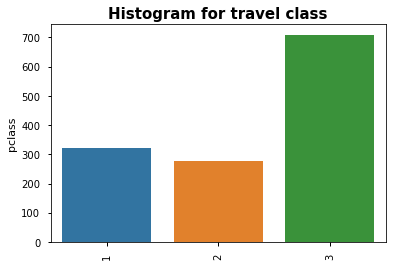

In [550]:
pclassProp = df4.pclass.value_counts()#/df4.pclass.value_counts().sum() 
#We divide above over the total number of passengers to get the proportion
nice_bar_plot("Histogram for travel class", pclassProp, 3)

We can see that the 3rd class is dominant

#### Here we take the non null values (there were assigned to -1) after we applied the cat.codes

In [551]:
# histogram for embarkation port
emb = [x for x in df4.embarked.values if (x >= 0)] 
S_emb = pd.Series(emb)                             
embProp = S_emb.value_counts()#/labeled_emb.value_counts().sum()
embProp = embProp.rename({2:'Southampton', 1:'Queenstown', 0:'Cherbourg'})
#We divide above over the total number of passengers to get the proportion

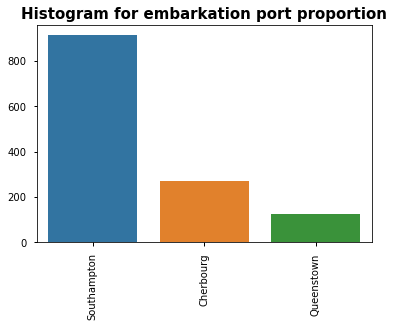

In [552]:
nice_bar_plot("Histogram for embarkation port proportion", embProp, 3)

Most people embarked from Southampton, which makes sense since that's where the Titanic embarked from.

In [553]:
# histogram for gender
sex_df = df4.sex.value_counts()
sex_df = sexProp.rename({1: 'Male',0: 'Female'})

In [554]:
(df4.sex.value_counts()/df4.sex.value_counts().sum())*100

1    64.400306
0    35.599694
Name: sex, dtype: float64

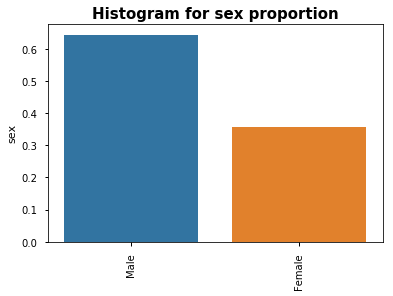

In [555]:
nice_bar_plot("Histogram for sex proportion", sex_df, 3)

The male represent 64.4%, against 35.6% for the female

In [556]:
df4.shape

(1309, 14)

Now for the ages, we only take the non-null ages to draw the histogram

In [557]:
df4 = df4[df4.age.notnull()]
df4.shape

(1046, 14)

Here, we split ages into discrete decade intervals


In [558]:
age_cut = pd.cut(df4.age, (0,10,20,30,40,50,60,70,80)).value_counts()
age_cut

(20, 30]    361
(30, 40]    210
(10, 20]    162
(40, 50]    132
(0, 10]      86
(50, 60]     62
(60, 70]     27
(70, 80]      6
Name: age, dtype: int64

We represent the histogram by intervals as follows:

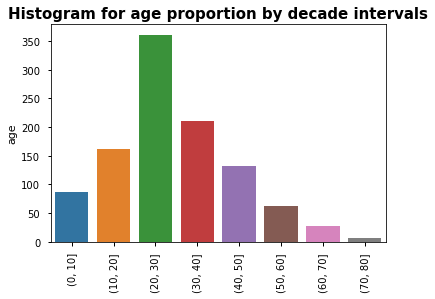

In [559]:
nice_bar_plot("Histogram for age proportion by decade intervals", age_cut, age_cut.sum())

#### 3. Proportion of passengers by cabin floor:
Here, we extract the 'cabin' column from our dataframe, and take only the non-null values. After that, we made an assumption that each floor is represented by the first letter of the cabin name. And also, if a person takes more than a cabin, those cabins are all on the same floor (we actually verified by going through the exhaustive list manually). In this case we map these cabins to the correspondong floor letter (as they are taken by 1 person)
This allows us to do our mapping so we count how many passengers are in each floor.

In [560]:
df5 = pd.read_excel('Data/titanic.xls')
cabin = list(df5['cabin'])
cabin = [x for x in cabin if str(x)!='nan']
floor = list(map(lambda x : x[0], cabin)) #We assume that if someone takes 2 or more cabines they are on the same floor
mapFloor = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}
floor = pd.Series(floor).map(mapFloor).value_counts().sort_index()
print("The number of non null values for the cabins are: ", len(cabin))

The number of non null values for the cabins are:  295


##### We notice that there is only 295 non null values for the cabins, and the majority of the information is missing.
##### This pie chart represent only the 'known' cabins, which correspond to 295 people. They are distributed by percentage as follows with the mapping {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}:

In [561]:
floor/floor.sum()*100

1     7.457627
2    22.033898
3    31.864407
4    15.593220
5    13.898305
6     7.118644
7     1.694915
8     0.338983
dtype: float64

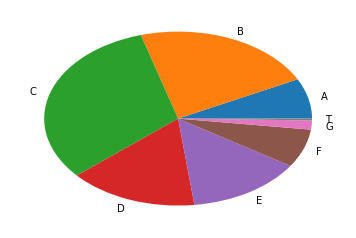

In [562]:
plt.pie(floor, labels=['A','B','C','D','E','F','G','T']);

#### 4. Proportion of survivors for each travel class:

In [563]:
df6 = pd.read_excel('Data/titanic.xls')

In [564]:
classSurvivor = df6.groupby('pclass').mean()['survived']
classSurvivor*100

pclass
1    61.919505
2    42.960289
3    25.528914
Name: survived, dtype: float64

These are the percentages of survivors for the first, second and third class, respectively.
#### Proportion of first class survivors


In [565]:
firstClass = classSurvivor[classSurvivor.index==1]
firstClass.loc[2] = 1 - firstClass.loc[1]
firstClass*100

pclass
1    61.919505
2    38.080495
Name: survived, dtype: float64

We can see that 61.92% of 1st class passengers survived 

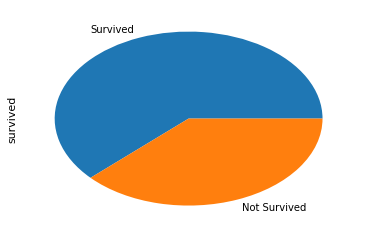

In [566]:
firstClass.plot.pie(labels=['Survived','Not Survived'])


#### Proportion of second class survivors


In [567]:
secondClass = classSurvivor[classSurvivor.index==2]
secondClass.loc[1] = 1 - secondClass.loc[2]
secondClass*100

pclass
2    42.960289
1    57.039711
Name: survived, dtype: float64

We can see that 42.96% of the second class survived, which is less compared to the first class.

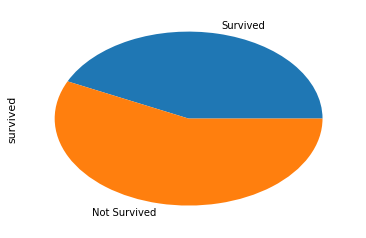

In [568]:
secondClass.plot.pie(labels=['Survived','Not Survived'])

#### Proportion of third class survivors

In [569]:
thirdClass = classSurvivor[classSurvivor.index==3]
thirdClass.loc[1] = 1 - thirdClass.loc[3]
thirdClass*100

pclass
3    25.528914
1    74.471086
Name: survived, dtype: float64

We can see that for the third class, there is only 25.53% of survivors, which is considerably less than than the first and the second one, which makes sense too, because the first two classes  were given the priority to embark on lifeboats.

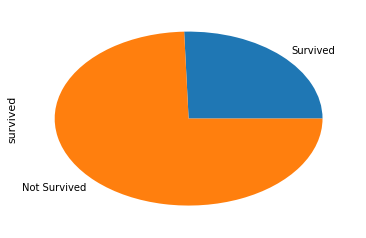

In [570]:
thirdClass.plot.pie(labels=['Survived','Not Survived'])

#### 3. Proportion of passengers that survived by travel class and sex: 

In [571]:
class_count=df6.groupby('pclass').size() #count the number of passenger per class
class_count.name="count" #rename the serie
sex_count=df6.groupby('sex').size() #count the number of passenger per sex
sex_count.name="count" #rename the serie
class_survive=df6.groupby('pclass')['survived'].sum() #count the number of survivor per class
sex_survive=df6.groupby('sex')['survived'].sum() #count the number of suvivor per sex

dfClass=pd.DataFrame([class_survive, class_count]) #create a dataframe for the class
dfSex=pd.DataFrame([sex_survive, sex_count]) #create a dataframe for the sex

proportion_survived_sex=dfSex.loc['survived']/dfSex.loc['count'] #calculate the proportion of survivor per sex
proportion_survived_class=dfClass.loc['survived']/dfClass.loc['count'] #calculate the proportion of survivor per class

In [572]:
#Helper function to draw the bar plot
def nice_bar_plot(data):  
    """
    create a bar plot with the data (a serie)
    x-axis = data index
    y-axis = data value
    """
    sns.barplot(data.keys(), data)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

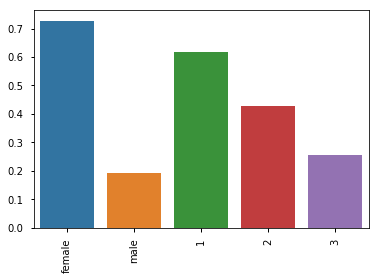

In [573]:
nice_bar_plot(proportion_survived_sex.append(proportion_survived_class))


#### 6. We create  2 equally populated age categories and calculate survival proportions by age category

In [574]:
df36 = pd.read_excel('Data/titanic.xls')

In [575]:
df36.shape

(1309, 14)

In [576]:
# drop related null values rows
df36 = df36[df36.age.notnull()]
df36 = df36[df36.pclass.notnull()]
df36 = df36[df36.sex.notnull()]
df36.shape

(1046, 14)

So we will work on a sample of 1046

#### We create 2 equally age categories split in the q = 0.5 quantile (median):

In [577]:
# equally populated age categories 
df36 = pd.read_excel('Data/titanic.xls')
df36.age = pd.qcut(df36.age, [0, 0.5, 1])

In [578]:
df36[df36.age.cat.codes==0].shape[0] #Cardinal of the first cut, represent 51.2% of the sample

536

In [579]:
df36[df36.age.cat.codes==1].shape[0] #Cardinal of the second cut, represent 48.8% of the sample

510

##### NB: The 2 cuts does not exactly have the same cardinality, and this is due to the fact that when cutting at the median age 28, people whose age is 28 are included in both categories. But since the difference is small compared to the total of samples, we will not worry about that.


In [580]:
# convert pclass to category
df36['pclass'] = df36.pclass.astype('category')

# convert sex to category
df36['sex'] = df36.sex.astype('category')

#### Resulting dataframe


In [581]:
dfResult = df36.groupby(['age', 'pclass', 'sex']).mean()['survived']
dfResult

age            pclass  sex   
(0.166, 28.0]  1       female    0.951220
                       male      0.531250
               2       female    0.910714
                       male      0.216216
               3       female    0.513761
                       male      0.183036
(28.0, 80.0]   1       female    0.967391
                       male      0.302521
               2       female    0.872340
                       male      0.083333
               3       female    0.372093
                       male      0.144000
Name: survived, dtype: float64

In [582]:
#Check if indexes are unique
dfResult.is_unique

True

Indeed, the indexes are unique